# Curso de 
# **Machine Learning: Introdução a algoritmos não supervisionados**


**Objetivos**

*   Definição de algoritmo não supervisionado
*   Agrupar seus dados e gerar rótulos para eles
*   Extrair os dummies de um dataset
*   Otimizar os parâmetros do K-Means
*   Conhecer os tipos de agrupamentos
*   Reduzir as dimensões de um data frame para visualizar em um gráfico












## Aula 01 - Conhecendo os dados

**1. Conhecendo o dataset**

Vamos começar importando o pandas. 
Com o pandas importado, vamos buscar os dados dos filmes pela URI e renomear as colunas do Dataframe:

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

In [2]:
# Carregando o dataset
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(url)

# Verificando se a importação está correta
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Trocando o nome das colunas
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**2. Extraindo os dummies**

Quando temos variáveis categóricas, uma manipulação muito comum é gerar os dummies da coluna categórica.

Podemos extrair os dummies da coluna de gêneros. Logo, vamos falar para o nosso Dataframe de filmes pegar a coluna gêneros como string (str) e pegar os dummies (get_dummies). Com isso, cada gênero será representado como uma coluna binária, na qual 0 significa que não possui o gênero e 1 que o possui. 

In [4]:
# Extraindo as variáveis categóricas de uma coluna, ou seja, capturando as informações da coluna generos e dividindo em colunas binárias
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Podemos pegar este Dataframe e pedir para o pandas concatená-lo (concat) com o de filmes com as colunas (axis=1).

In [5]:
# Concatenando os dois dataframes (filmes + generos) um ao lado do outro (axis=1)
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**3. Escalando os dados**

Nesta aula o instrutor diz que ao realizar o StandardScale, encontramos a categoria de maior relevância para cada um dos filmes.

Na realidade esta informação não é verdadeira, com as informações contidas no dataset não conseguimos afirmar qual gênero é mais relevante aos respectivos filmes.

Aplicar o StandardScale ou outra padronização nos dados, quando features apresentam escalas diferentes é uma boa pratica, pois alguns algoritmos como K-MEANS, PCA, SVM e outros... São afetados pela diferença de escala entre as features. Para exemplificar, imagine o mesmo problema em clusterização de filmes, porém analisando duas features, tempo e custo. O tempo geralmente varia de 90 a 180 minutos o custo na casa dos milhões de dólares, realizar a padronização faz com que esses valores tenham escalas relativamente próxima e não impacte negativamente seu algoritmo de ML.

**Como os dados são binários o k-means deve até ser evitado, para esse caso a distancia Euclidiana não trás um significado real, visto que o espaço dimensional dos dados passa a ser discreto e sem uma origem natural**. Para esse problema você poderia transformar os gêneros em dados categóricos e aplicar variações do k-means conhecida como k-modes, introduzidas no paper de Zhexue Huang (https://arxiv.org/ftp/cs/papers/0603/0603120.pdf)

*Como analisamos a influência de cada tipo de genero em cada um dos filmes?*

Pré-processando o nosso dataframe para conseguirmos trabalhar com ele futuramente - por exemplo, criando modelos de machine learning para agrupar e recomendar os filmes de alguma forma. Nosso objetivo atualmente é reescalar os dados de 0 a 10, mas essa escala poderia ter qualquer valor ("de N a N").

Temos que reescalar os dummies para saber quais dos gêneros mais influenciam os filmes. Portanto, vamos importar o escalador da biblioteca sklearn e criar um objeto a partir da classe StandardScaler:

In [6]:
# Pré-processamentos dos dados 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Vamos falar para o scaler aprender com os dummies e transformá-los (fit_transform) para que dessa forma, tenhamos mais informações sobre como os gêneros influenciam o filme:

In [7]:
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

**O que vimos nessa aula:**

* O que são variáveis categóricas
* O que são e como extrair os dummies
* Como importar um dataset pelo pandas
* Como concatenar dataframes
* Como reescalar os dados

# **Aula 02 - Começando a agrupar (clusterização)**

Em primeiro lugar, temos que importar do módulo de cluster da sklearn o algoritmo do K-Means.

In [8]:
# Importando a biblioteca a ser utilizada

from sklearn.cluster import KMeans

Após isso, podemos criar nosso objeto que representará o modelo KMeans. Para criar um objeto do K-Means, precisamos falar o número de clusters (n_clusters), isto é, quantos grupos diferentes serão agrupados. No caso, apenas para testar o algoritmo, vamos passar três como valor:

In [9]:
modelo = KMeans(n_clusters=3)

O número de clusters representa o número de grupos que o K-Means irá utilizar para alocar os dados. Esse número é o quantidade de grupos que teremos ao final da execução do algoritmo. O K-Means precisa saber o número de grupos antes de ser instanciado. É a partir desse número que ele consegue classificar os dados.

Em seguida, podemos falar para o K-Means agrupar os dados (generos_escalados) para a gente através do método fit:

In [10]:
modelo.fit(generos_escalados)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Podemos ver os resultados do agrupamento imprimindo os rótulos (labels_) do modelo:

In [11]:
print(f'Grupos {modelo.labels_}')

Grupos [1 1 0 ... 0 1 0]


**2 - Entendendo como o KMeans funciona**

O site [Naftali Harris](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) pode nos ajudar, de forma interativa, a entender como o KMeans funciona de fato.

Recapitulando: quando queremos que o KMeans utilize 3 grupos na sua clusterização, ele cria 3 centroides que definirão os pontos centrais de cada grupo. Em seguida, ele calculará a distância entre os centroides, e, a partir das suas metades, o pertencimento dos dados da amostra.

Feito isso, o KMeans tentará atualizar a posição dos centroides para otimizar a distância com os dados do grupo. Isso é feito até o momento em que a posição dos centroides e a distribuição dos dados entre os grupos não é mais alterada.

**O que aprendemos**

* A criar um modelo K-Means
* Como o K-Means funciona
* O que são os centroides
* A visualização dos centroides e a sua classificação

# **Aula 03 - Vendo os centróides**

**1 - Visualizando os centroids**

Vamos começar visualizando os centróides de cada grupo. Para isso, podemos falar para o Python imprimir os centróides e os nomes dos gêneros - que são as colunas do data frame generos:

In [12]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03822351 -0.26986909 -0.21142446 -0.25240778 -0.27045122  0.25371977
  -0.15864127  0.1372192   0.18189635 -0.14407293 -0.07696738 -0.27783672
  -0.11368444  0.02420559 -0.18679698  0.21194286 -0.26197868 -0.47119447
   0.09653525  0.04104532]
 [-0.05917995 -0.03163409  0.87462602  2.28481777  2.50336068  0.22972547
  -0.31356031 -0.20223469 -0.58807688  0.85367356 -0.09492563 -0.27783434
   0.20599516  0.38610939 -0.13329649 -0.27430346  0.12194548 -0.47258112
  -0.16937749 -0.08325388]
 [-0.05917995  0.56582497  0.14713161 -0.23286535 -0.26769185 -0.59781548
   0.42974245 -0.21581509 -0.18071478  0.01541683  0.18966081  0.6632909
   0.16614075 -0.17695357  0.42833209 -0.34587079  0.4990158   1.12535967
  

Para facilitar o trabalho e a manipulação desses dados, vamos criar um data frame chamado grupos a partir dos centroides.

Portanto, falamos para o pandas (pd) criar um DataFrame a partir dos centroides e nomear as colunas (columns) com o nome dos gêneros:

In [13]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.038224,-0.269869,-0.211424,-0.252408,-0.270451,0.253720,-0.158641,0.137219,0.181896,-0.144073,-0.076967,-0.277837,-0.113684,0.024206,-0.186797,0.211943,-0.261979,-0.471194,0.096535,0.041045
1,-0.059180,-0.031634,0.874626,2.284818,2.503361,0.229725,-0.313560,-0.202235,-0.588077,0.853674,-0.094926,-0.277834,0.205995,0.386109,-0.133296,-0.274303,0.121945,-0.472581,-0.169377,-0.083254
2,-0.059180,0.565825,0.147132,-0.232865,-0.267692,-0.597815,0.429742,-0.215815,-0.180715,0.015417,0.189661,0.663291,0.166141,-0.176954,0.428332,-0.345871,0.499016,1.125360,-0.142904,-0.057060


Podemos ver o data frame colocando a variável grupos como a última instrução da célula.

Vamos visualizar os centroides transpondo (*transpose*) o data frame de grupos e pedindo para o pandas plotar (*plot*) um gráfico de barras (*bar*). Como queremos que cada cluster tenha seu próprio gráfico, vamos falar que teremos subplots e para facilitar a visualização, vamos definir um tamanho para a figura (*figsize*) e dizer que não queremos compartilhar os labels do eixo x:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f00973070b8>,
      dtype=object)

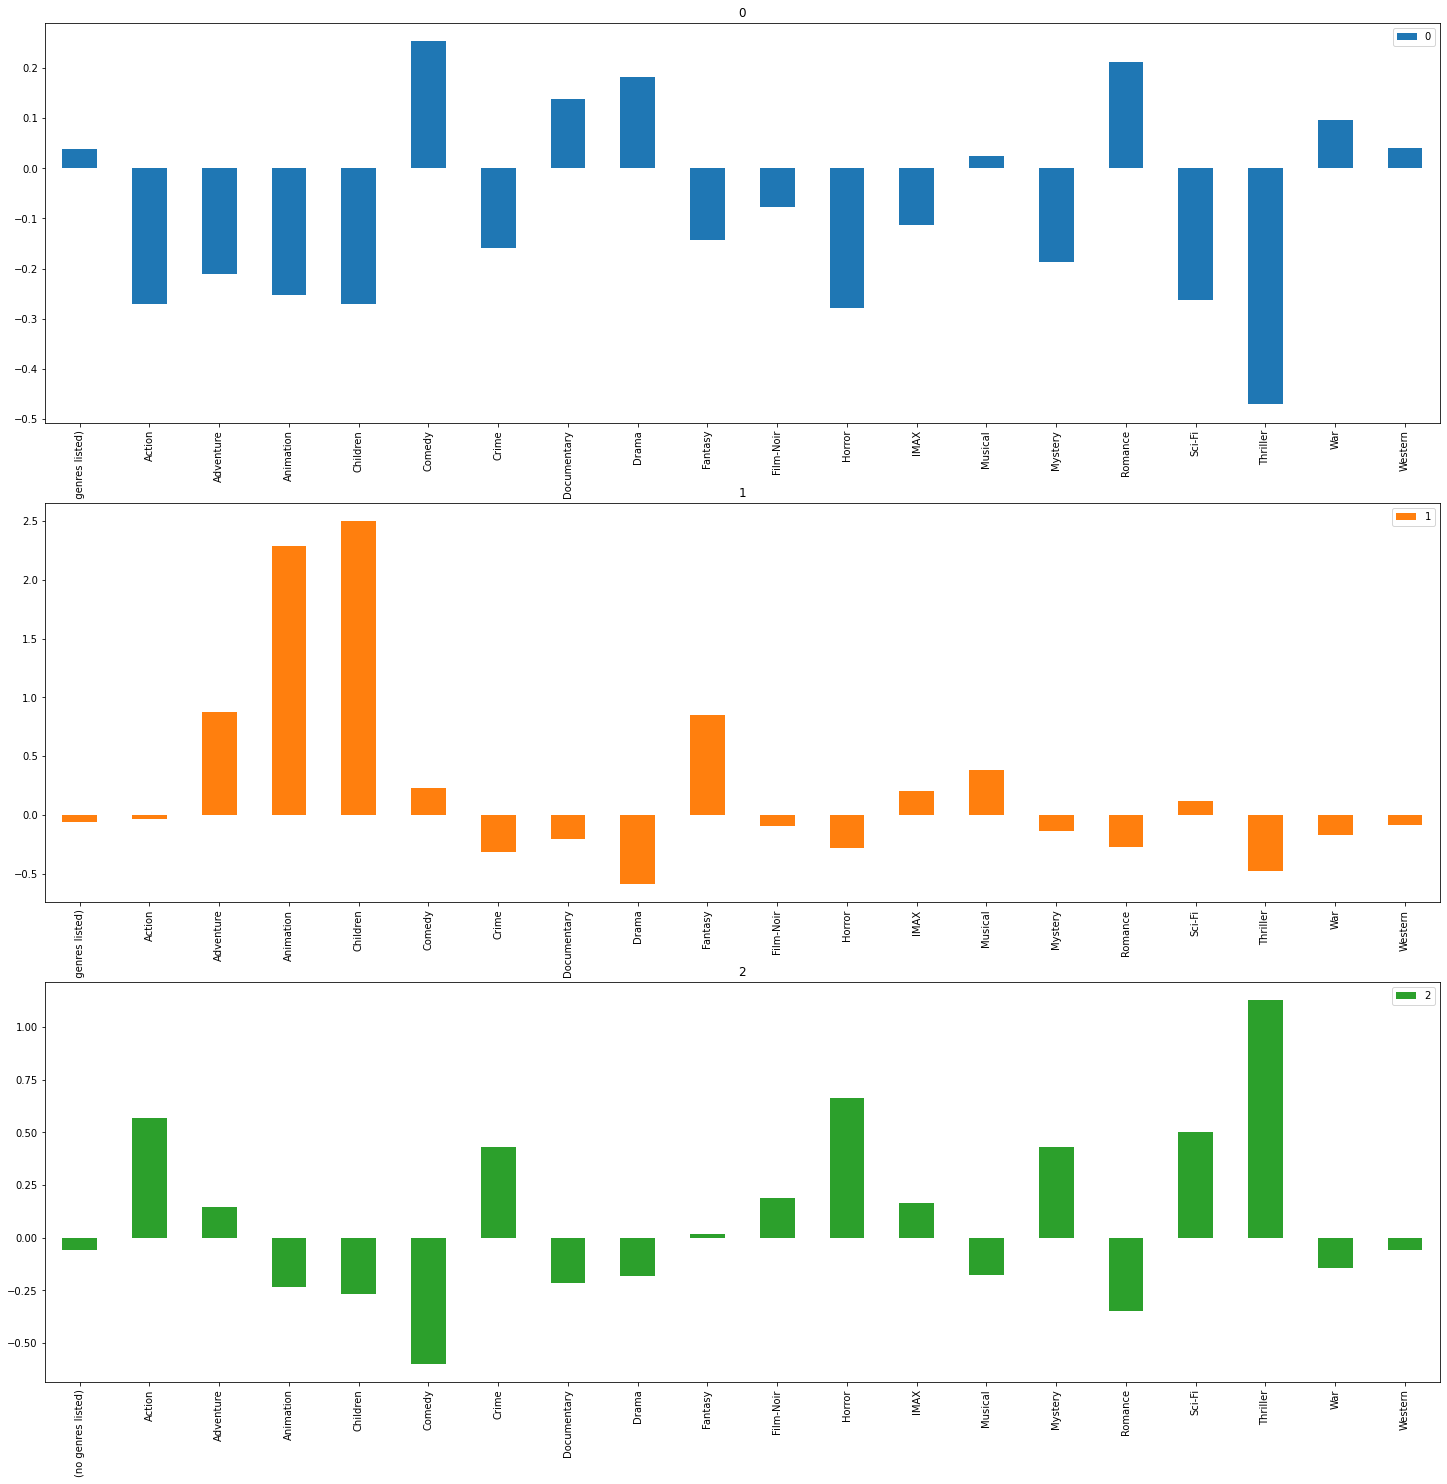

In [14]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

Podemos visualizar os filmes pertencentes a algum grupo, por exemplo o grupo 0. Basta realizar um filtro pelos labels_ do modelo e pedir alguns dados da amostra:

In [15]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9661,181413,Too Funny to Fail: The Life and Death of The D...,(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5218,8512,Silent Movie (1976),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6225,45732,My Super Ex-Girlfriend (2006),Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9302,158972,Toni Erdmann (2016),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3510,4798,Indiscreet (1958),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**3 - Criando um gráfico com o seaborn**

Vamos plotar um gráfico de pontos. Porém, temos 20 gêneros, ou seja, 20 dimensões. Logo, antes de plotar o gráfico, temos que **reduzir as dimensões.** Para isso, vamos utilizar o algoritmo ***TNSE*** do módulo ***manifold*** da ***sklearn***.

In [16]:
from sklearn.manifold import TSNE

A partir desse algoritmo podemos criar um objeto TSNE e utilizar o método fit_transform. Este método nos retorna um array do numpy com as features reduzidas.

In [17]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

Agora basta importamos o seaborn e plotarmos um gráfico de dispersão (**scatterplot**).

Mas antes, vamos atribuir um valor para o tamanho da figura (**figure.figsize**), apenas para facilitar a visualização:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


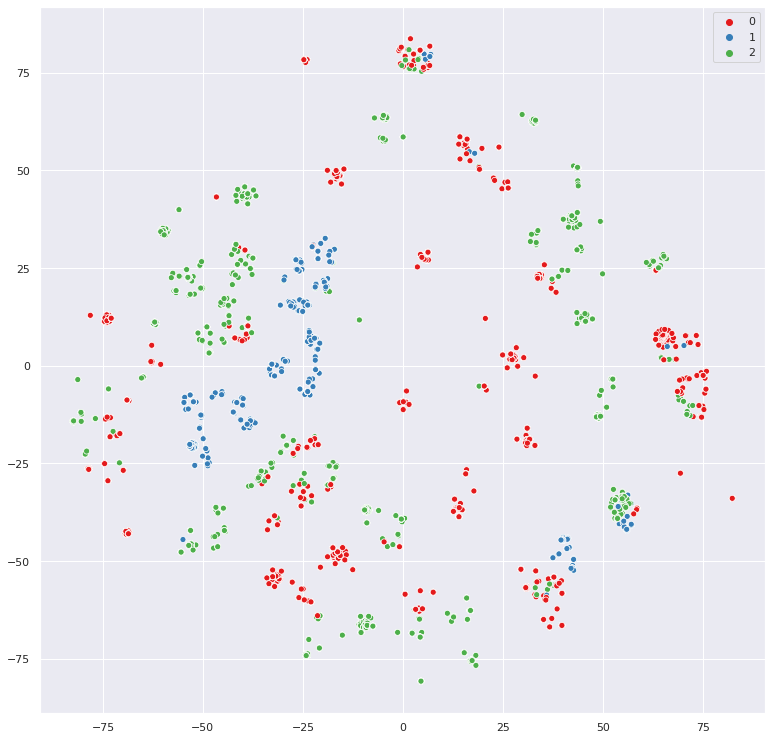

In [18]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

Quando reduzimos a dimensionalidade, perdemos informações sobre como os dados estão dispostos. Por exemplo, podemos pensar que dois grupos estão próximos quando olhamos em duas dimensões, mas na verdade eles estão distantes em outras das n-dimensões.

**O que vimos nessa aula:**

* Como reduzir a dimensão com TSNE
* Como plotar um gráfico de pontos com o seaborn
* Como visualizar os centróides
* Como realizar filtros nos dataframes

# **Aula 04 - Escolhendo o número de grupos**

**1 - Agrupando em 20 grupos**

Vamos tentar fazer um agrupamento um pouquinho diferente do primeiro. Neste caso, vamos criar um modelo **K-Means** e falar para ele agrupar os dados em 20 grupos (um para cada gênero). Com o modelo criado, vamos treiná-lo passando os **generos_escalados**:

In [19]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Como antes, vamos criar um data frame a partir do centroides do grupo:

In [20]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

E plotar um gráfico para cada centroide. Dessa vez, vamos rotacionar (**rot**) os rótulos do eixo **x** para ficar mas legível:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0093ef2908>,
      dtype=object)

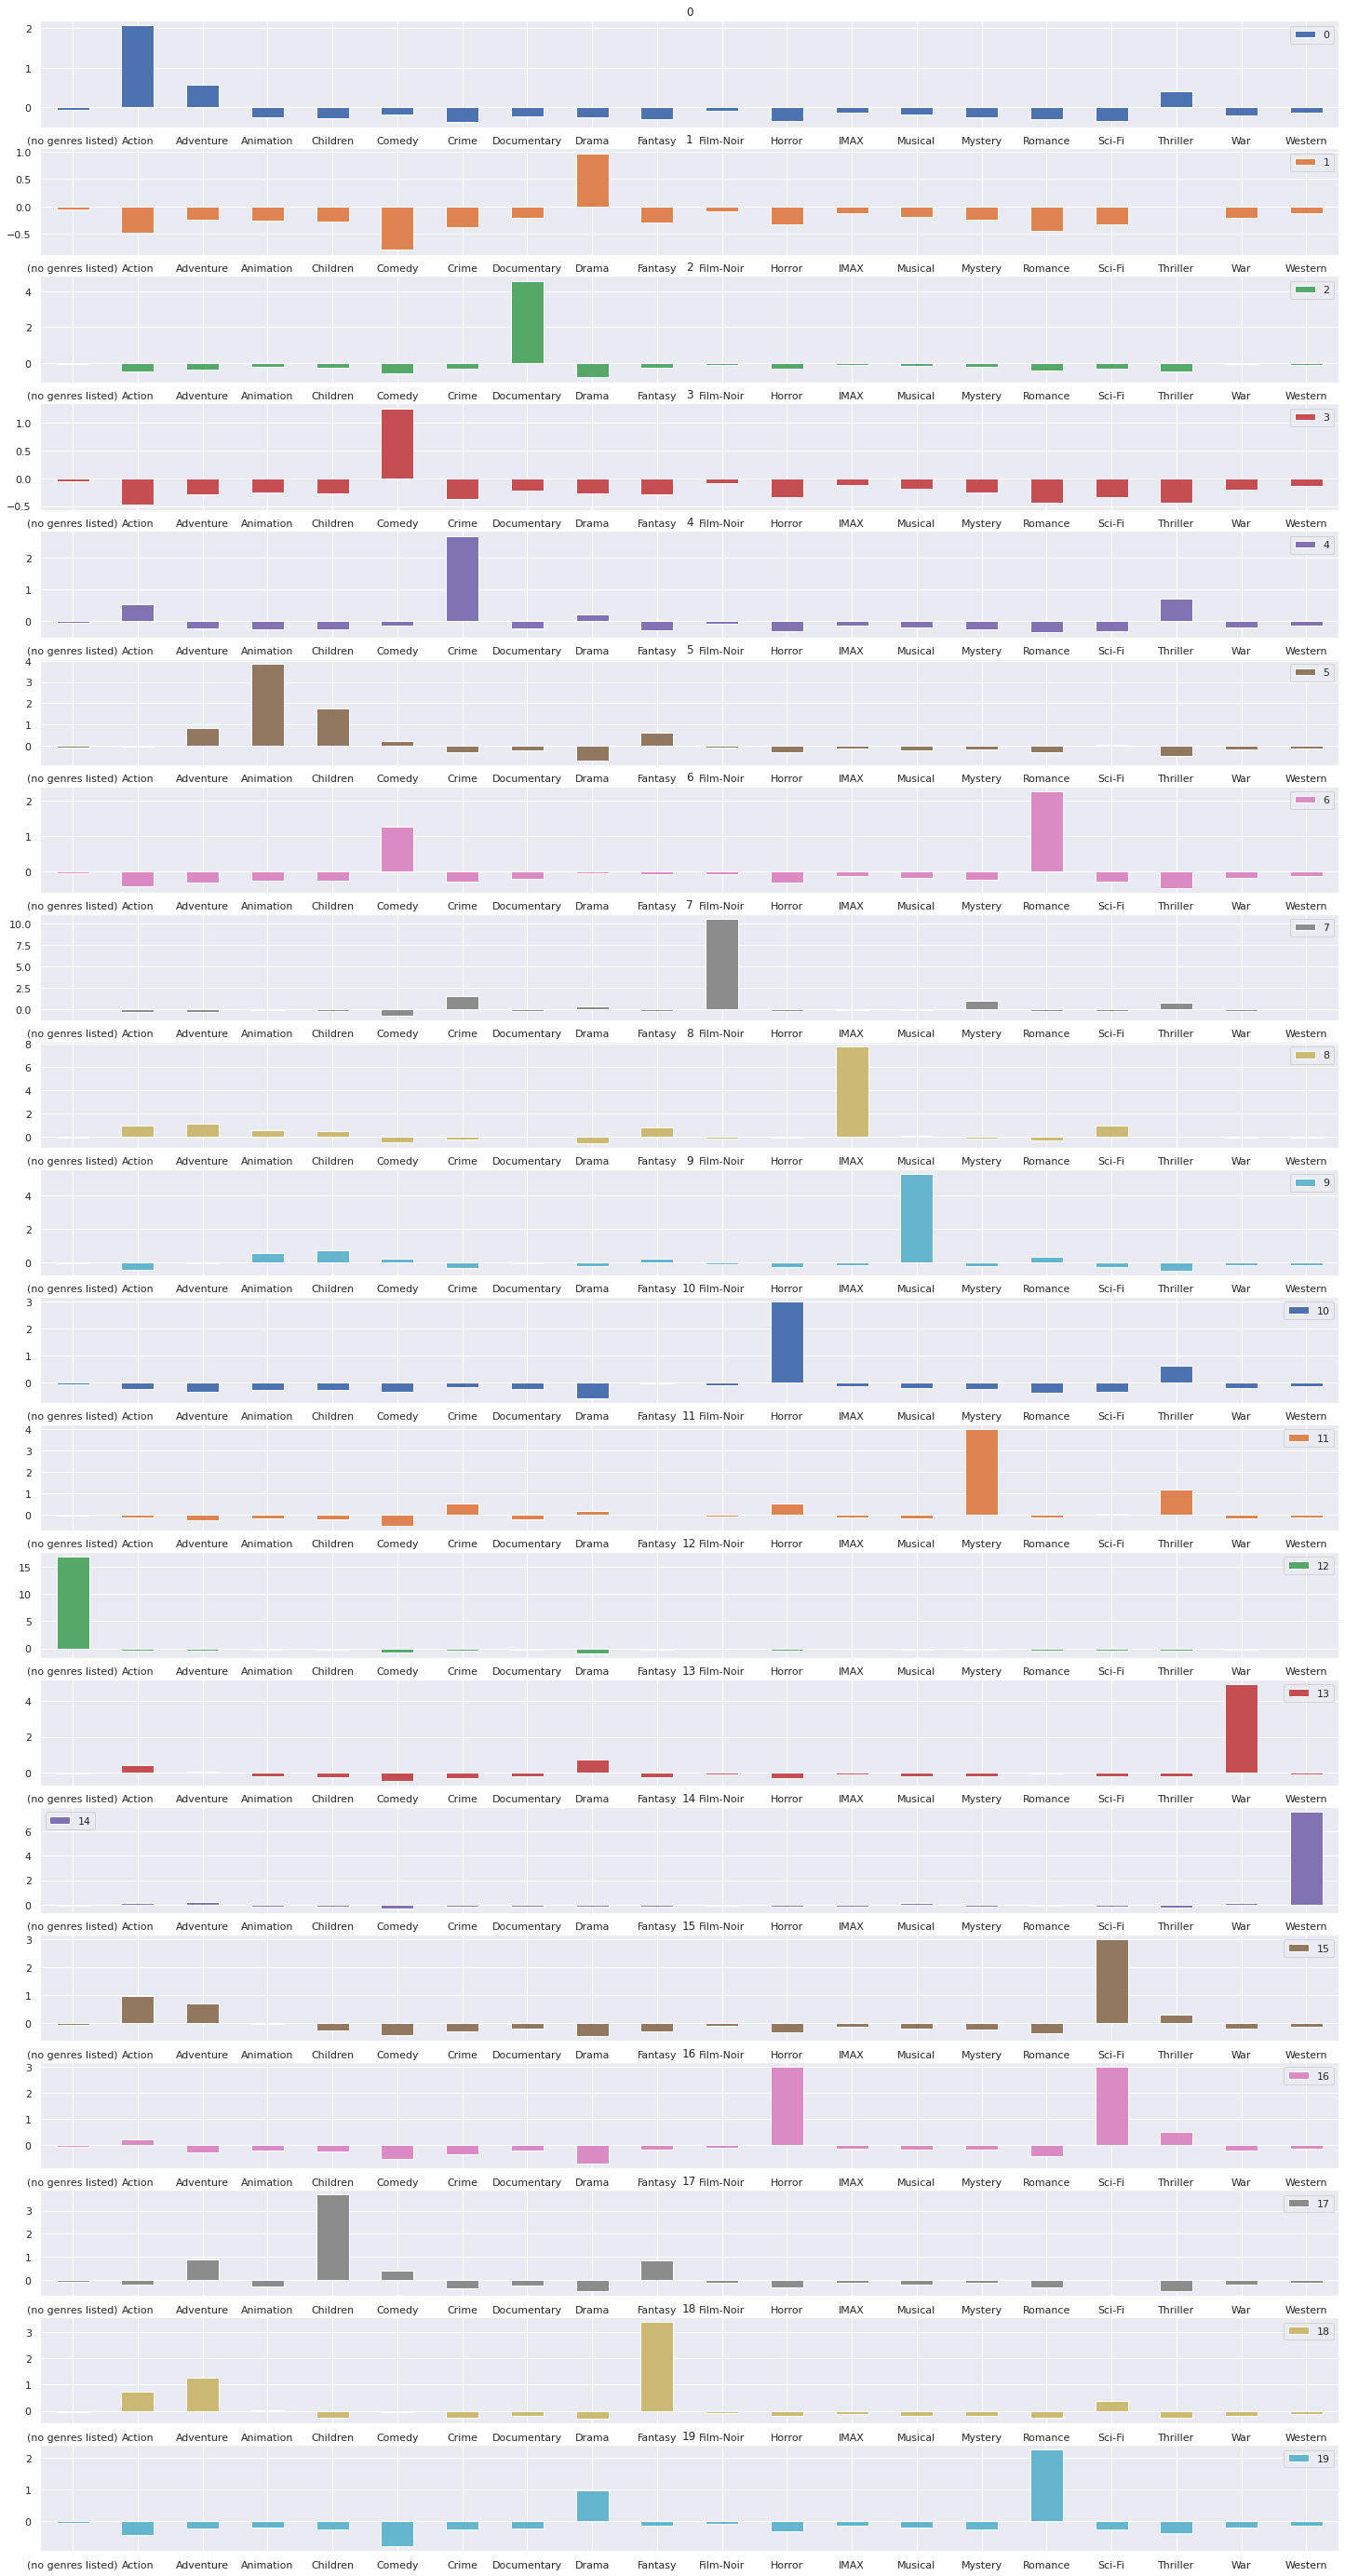

In [21]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

Como antes, vamos pegar algum grupo e fazer uma filtragem no data frame de filmes para ver como foram agrupados:

In [22]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2266,3007,American Movie (1999),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4938,7443,This So-Called Disaster (2003),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5519,26524,"Times of Harvey Milk, The (1984)",Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5316,8827,"Bill Cosby, Himself (1983)",Comedy|Documentary,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8885,134248,Hot Girls Wanted (2015),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6526,54185,Manufactured Landscapes (2006),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9652,180265,Jim & Andy: The Great Beyond (2017),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9405,164917,13th (2016),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3750,5224,Promises (2001),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7709,90245,Antonio Gaudí (1985),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**2 - Quantos grupos escolher?**

Aparentemente, os dados foram agrupados de uma maneira que faz sentido. Mas então, quantos grupos devemos usar?

Vamos criar a função que recebe o número de clusters e os dados e retorna o número de clusters e o erro (*inertia_*) daquele modelo:

In [23]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [29]:
#testando a função
kmeans(20, generos_escalados)

[20, 55107.96235714314]

**3 - O método do cotovelo**

Quando testamos um algoritmo de agrupamento como o K-Means, temos que passar o número de grupos que desejamos para segmentar os dados.

Quando passamos um número muito pequeno, temos um problema que dados que não pertencem ao mesmo grupo, podem ficar agrupados no mesmo cluster.

Quando o número de grupos é muito elevado, temos justamente o problema de existirem grupos muito semelhantes. Essa semelhança faz com que talvez a melhor solução seja que estes dados estejam agrupados no mesmo grupo

In [30]:
kmeans(3, generos_escalados)

[3, 167964.8690129104]

Vamos rodar essa função começando a agrupar em um único grupo e ir agrupando até 40 grupos. Para isso, vamos usar uma compressão de lista do Python:

In [24]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

*Lembrando que podemos ver essa lista colocando a variável como último conteúdo da célula.*

Para facilitar o trabalho, vamos transformar essa variável em um data frame para facilitar sua manipulação:

In [33]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
#resultado.round(2)

Agora, basta plotarmos um gráfico da coluna *inertia* do data frame. Lembrando que devemos passar a coluna *grupos* como parâmetro dos rótulos do eixo x:

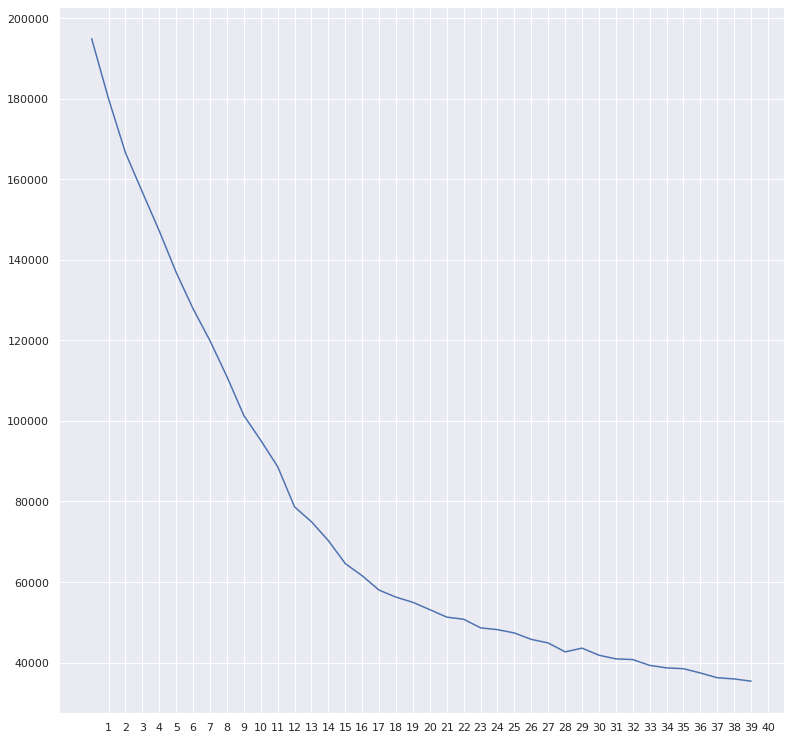

In [26]:
resultado.inertia.plot(xticks=resultado.grupos)

Podemos ver que o ponto de quebra no gráfico foi próximo ao número 17, logo, esse é o número de clusters que otimiza nosso modelo. Podemos rodar um novo modelo com 17 grupos e mostrar seus centroides:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0093123dd8>,
      dtype=object)

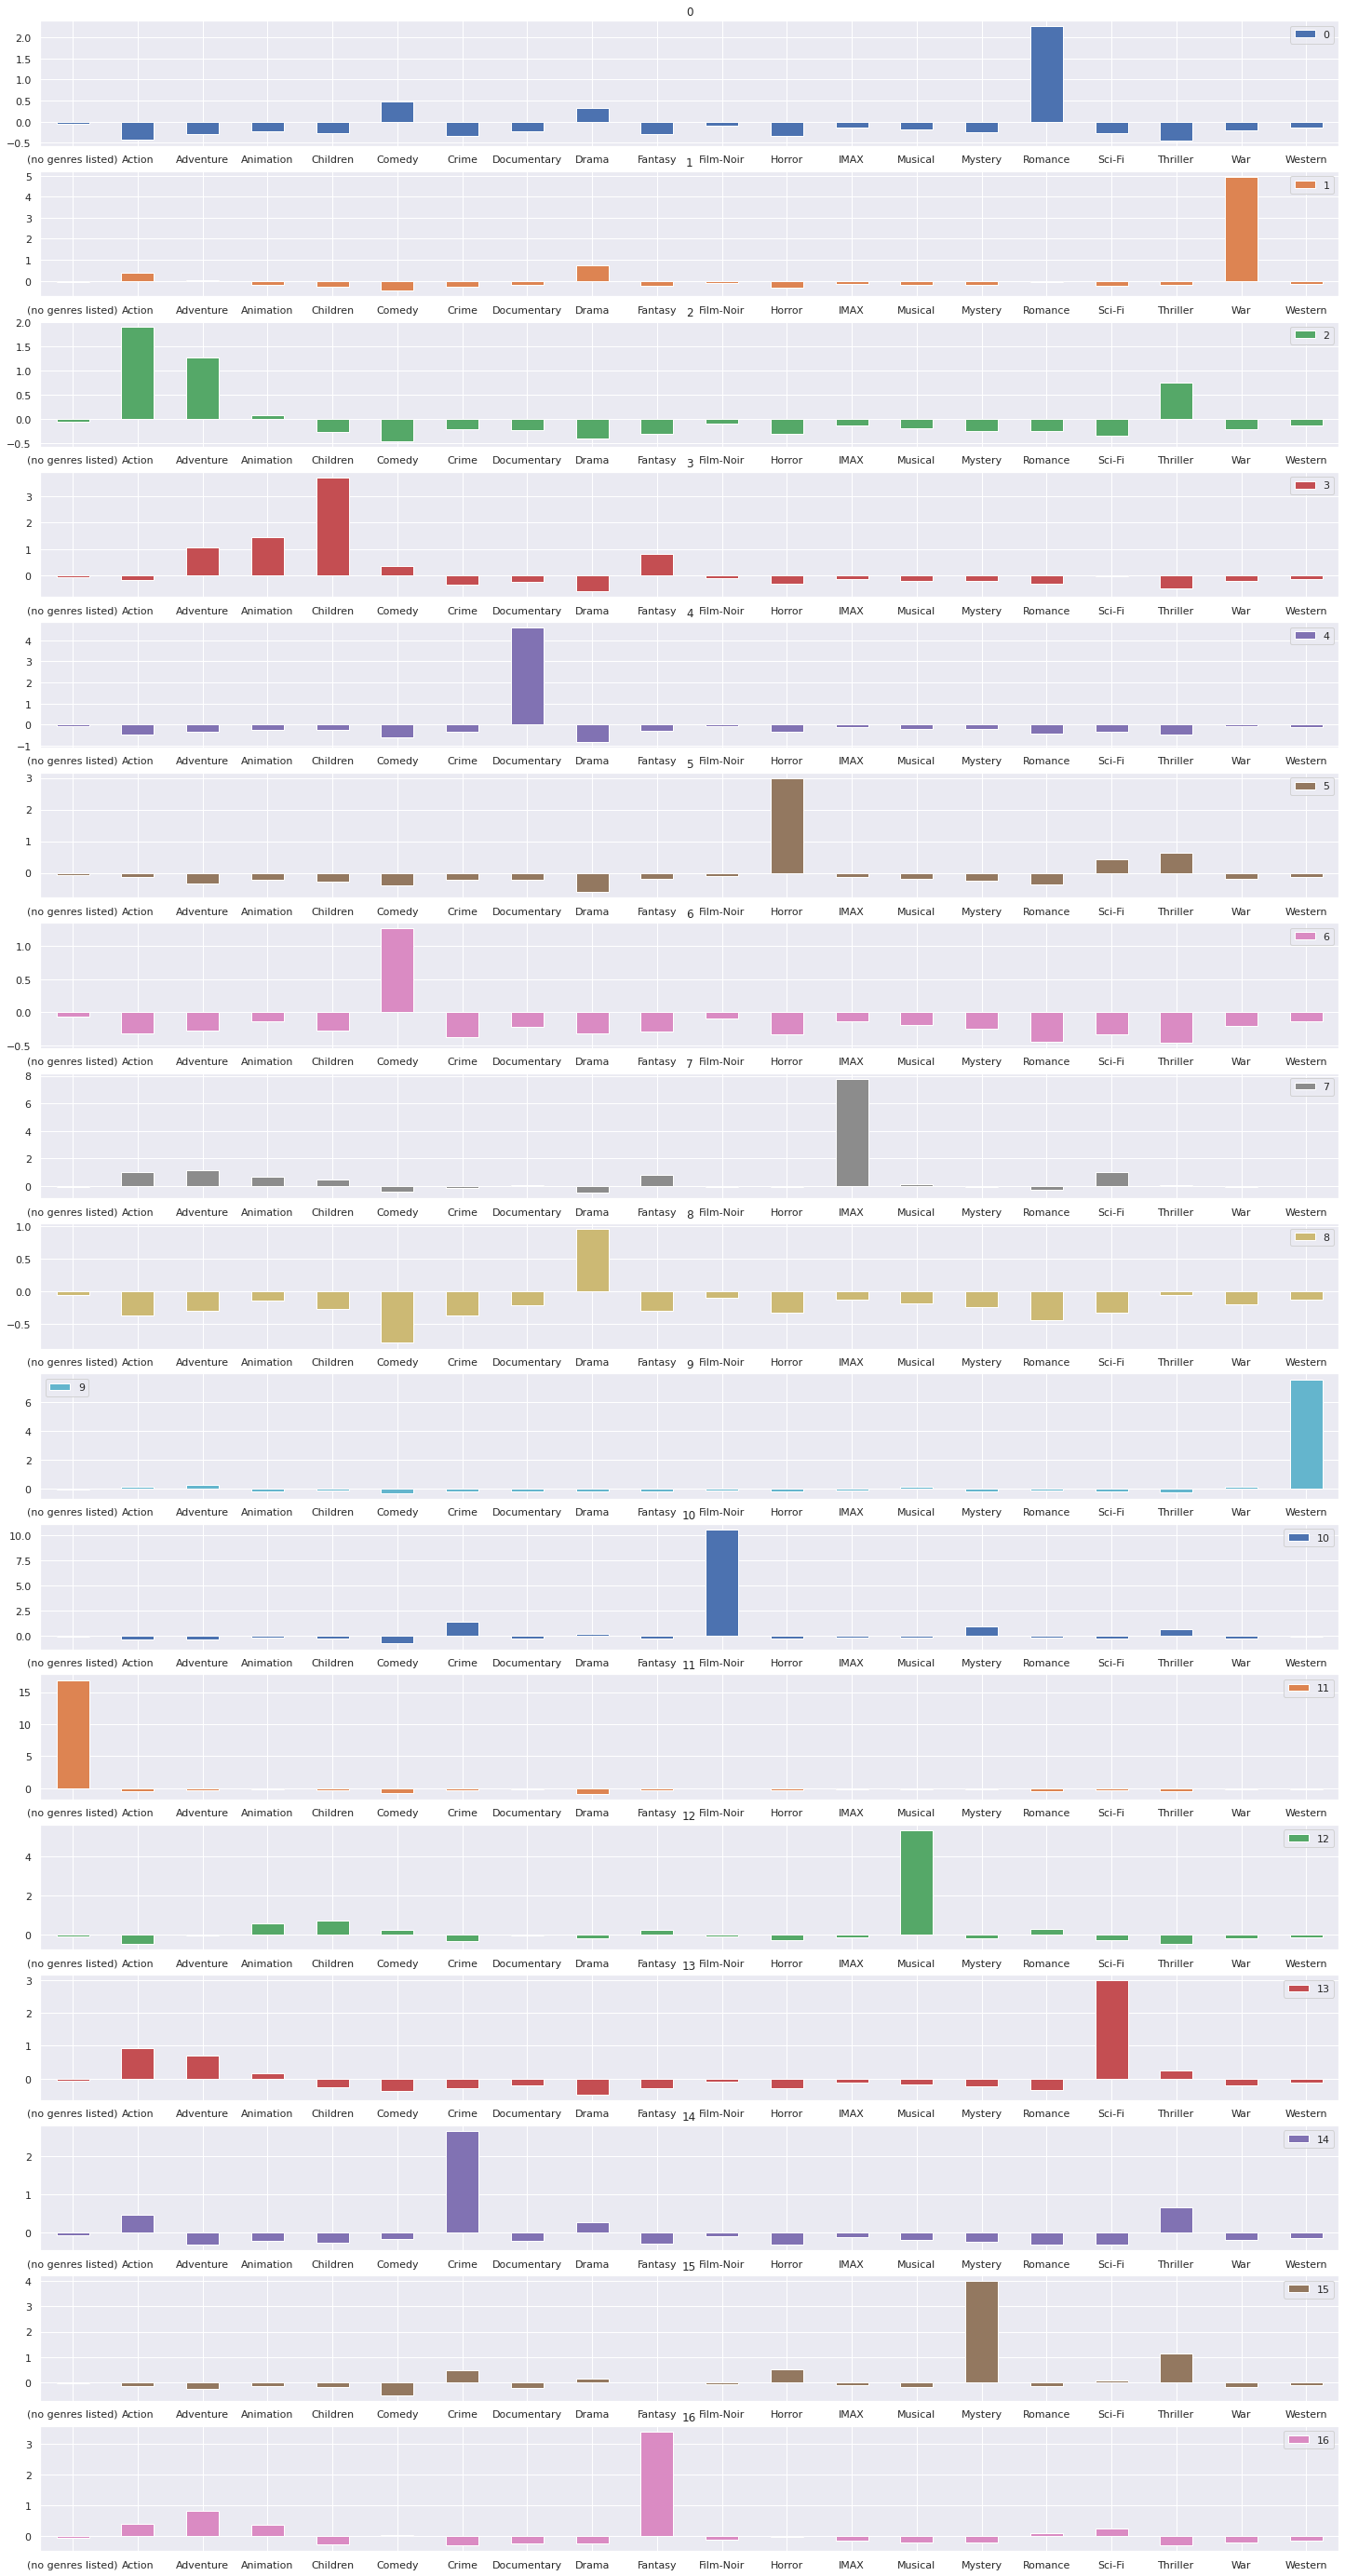

In [27]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

Podemos também realizar um filtro por algum grupo para ver se fazem sentido:

In [37]:
grupo = 9

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4566,6785,Seven Brides for Seven Brothers (1954),Comedy|Musical|Romance|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2743,3681,For a Few Dollars More (Per qualche dollaro in...,Action|Drama|Thriller|Western,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3453,4710,"Shootist, The (1976)",Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2786,3727,Near Dark (1987),Horror|Western,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
581,714,Dead Man (1995),Drama|Mystery|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7353,78467,Jonah Hex (2010),Action|Drama|Thriller|Western,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
424,487,Lightning Jack (1994),Comedy|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1084,1408,"Last of the Mohicans, The (1992)",Action|Romance|War|Western,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
515,599,"Wild Bunch, The (1969)",Adventure|Western,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8757,128360,The Hateful Eight (2015),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Veremos que o agrupamento parece fazer muito sentido com o que esperamos.

**Revisão**

* Qual o problema de termos muitos ou poucos grupos
* Como é calculado o erro do modelo
* O que é o elbow method
* Como otimizar o número de clusters para o K-Means

# Erro médio e erro médio quadrado

Vimos que o K-Means utiliza o erro para ver a qualidade do modelo. Este erro é a distância do centroide para cada dado pertencente ao grupo.

Mas como essa distância é calculada de fato?

O K-Means utiliza a seguinte função de erro. Vamos dizer que a distância de um ponto de um grupo para o centróide vale 2. Quando somamos a distância de todos os pontos, chamamos de erro médio absoluto, ou [mean absolute error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) em inglês.

Porém, queremos penalizar os pontos mais distantes do centroide - pois, um ponto muito distante do centroide pode não pertencer àquele grupo.

Uma maneira efetiva de penalizar esses dados é elevando suas distâncias ao quadrado. Isto é, aquela distância de valor 2, quando elevada ao quadrado, vale 4. Portanto, o erro é maior do que antes.

Esse método é chamado de erro médio quadrado, ou [mean squarred error (MSE)](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio).

Existe uma discussão no [Stack Exchange sobre esses dois tipos de erro.](https://stats.stackexchange.com/questions/48267/mean-absolute-error-or-root-mean-squared-error) É interessante dar uma olhada para ver como outras pessoas explicam a respeito do assunto. (Link em inglês)

# **Aula 05 - Agrupamento Hierárquico**

**1- Conhecendo o agrupamento hierárquico**

Algoritmo de agrupamento hierárquico permite definir modelos que agrupam nossos dados definindo uma hierarquia entre eles. Para saber um pouco mais, você pode acessar este link: https://www.saedsayad.com/clustering_hierarchical.htm

Vamos começar importando o algoritmo ***AgglomerativeClustering*** da biblioteca **sklearn**:

In [38]:
from sklearn.cluster import AgglomerativeClustering

Algoritmo importado, vamos criar um modelo e, seguindo o K-Means, vamos falar que queremos agrupar em 17 grupos. Modelo criado, basta falar para ele aprender e retornar os grupos (fit_predict):



In [41]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados) #e retornar os grupos
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

Vamos rodar o algoritmo **TSNE** para visualizar os dados. Para isso, vamos utilizar a mesma abordagem que utilizamos anteriormente. Criar um objeto a partir da classe e pedir para ele transformar nossos gêneros:

In [42]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 61.472813 , -24.711592 ],
       [-15.132114 ,  40.16065  ],
       [  5.5290513,  22.03853  ],
       ...,
       [  3.2216215,  -9.274026 ],
       [ 11.997607 , -49.061356 ],
       [-26.331476 ,  14.821811 ]], dtype=float32)

Bacana! Agora, basta plotar com um gráfico de dispersão passando como parâmetro de cores os grupos criados pelo **AgglomerativeClustering**:




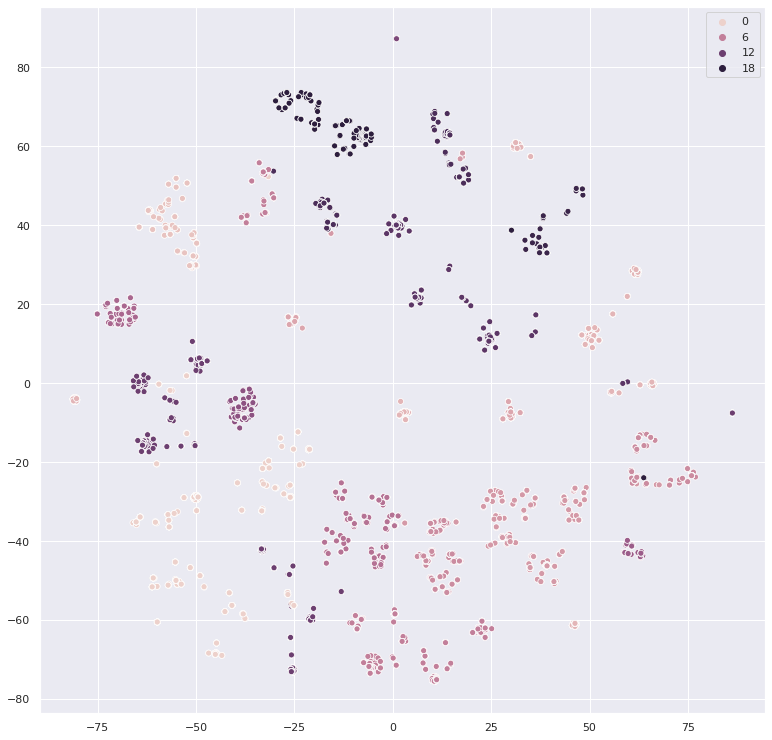

In [47]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos )

**2 - Plotando um dendrograma**

Porém, quando utilizamos o agrupamento hierárquico, uma forma comum de visualização é através do dendrograma. 
Para plotar o dendrograma, precisamos da matriz de distâncias dos dados e da função que plota o dendrograma propriamente dito. 
Vamos importá-las da biblioteca **scipy**:

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

Antes de plotar o dendrograma, vamos agrupar novamente os dados com o K-Means para ter uma visualização dos centroides mais próximos à célula do dendrograma (e para sobrescrever as variáveis que usamos com o mesmo nome):



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f00921b7f60>,
      dtype=object)

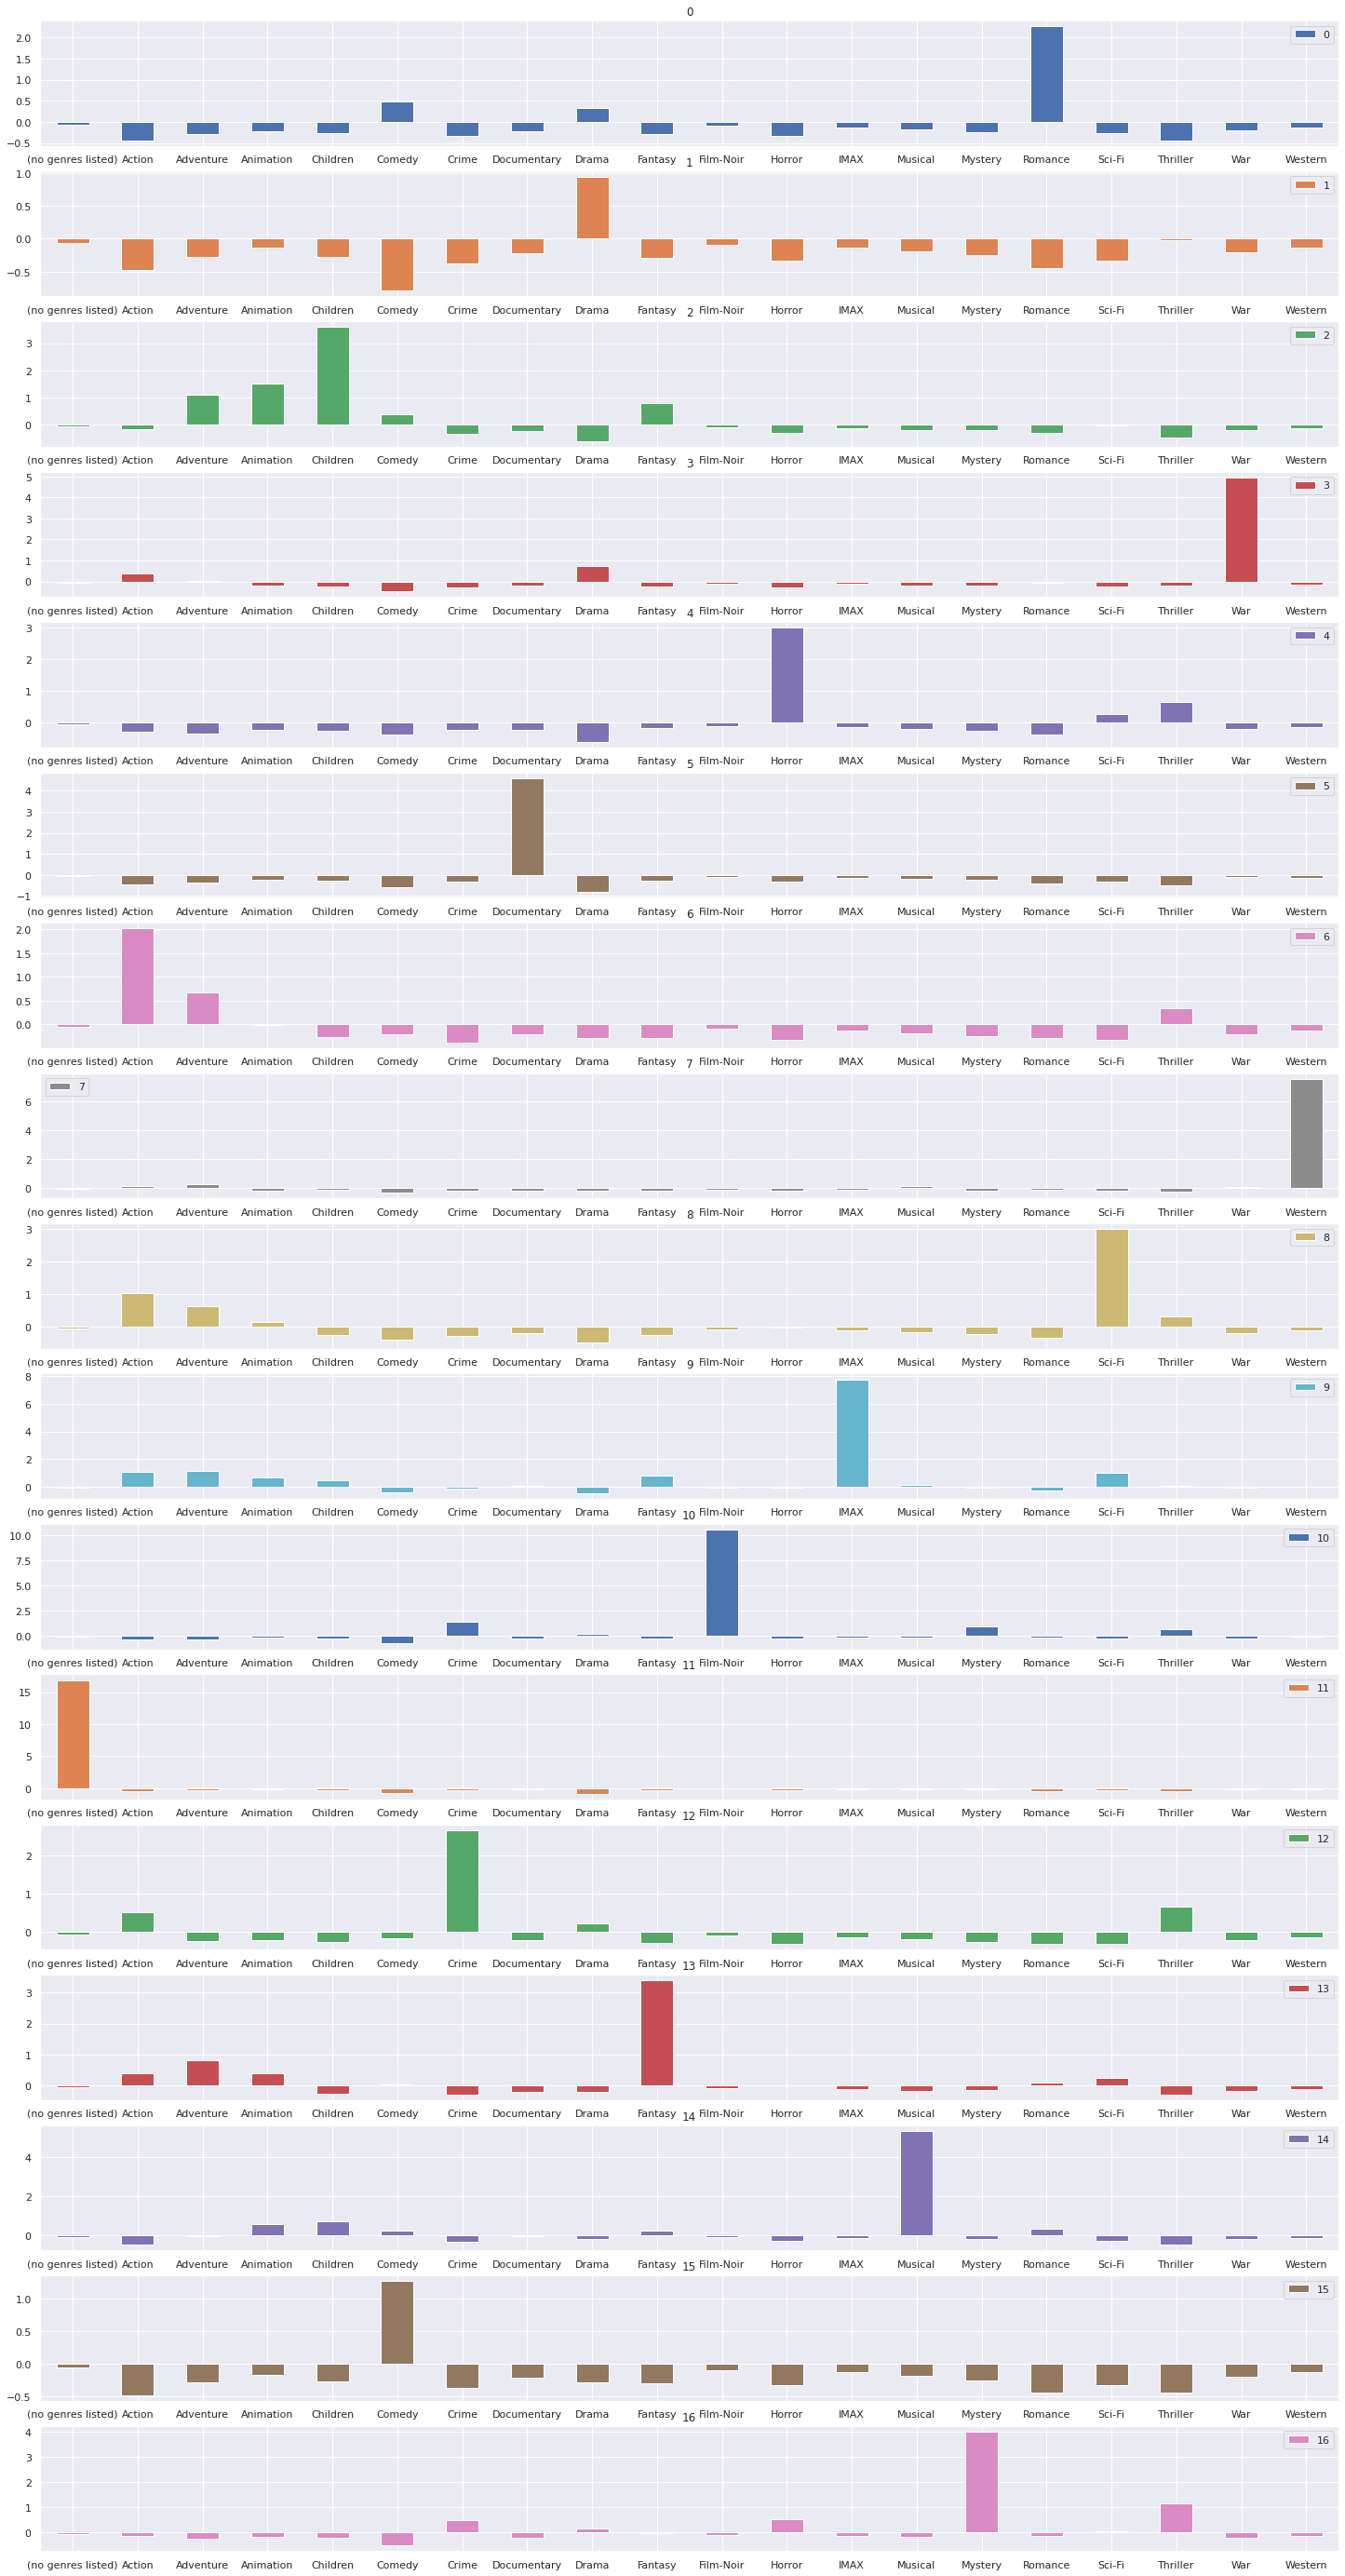

In [49]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

Agora, basta criarmos a matriz de distâncias baseada nos grupos do K-Means e plotar o dendrograma:

In [50]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        , 15.        ,  2.43057707,  2.        ],
       [ 0.        , 17.        ,  2.87863937,  3.        ],
       [ 6.        , 18.        ,  3.02732865,  4.        ],
       [12.        , 19.        ,  3.41900981,  5.        ],
       [ 8.        , 20.        ,  3.5002965 ,  6.        ],
       [ 4.        , 21.        ,  3.81073652,  7.        ],
       [13.        , 22.        ,  4.18401182,  8.        ],
       [ 2.        , 23.        ,  4.67665729,  9.        ],
       [16.        , 24.        ,  4.69886679, 10.        ],
       [ 5.        , 25.        ,  5.15315652, 11.        ],
       [ 3.        , 26.        ,  5.2698778 , 12.        ],
       [14.        , 27.        ,  5.81254896, 13.        ],
       [ 7.        , 28.        ,  7.87507517, 14.        ],
       [ 9.        , 29.        ,  8.25792609, 15.        ],
       [10.        , 30.        , 10.81599373, 16.        ],
       [11.        , 31.        , 17.06446045, 17.        ]])

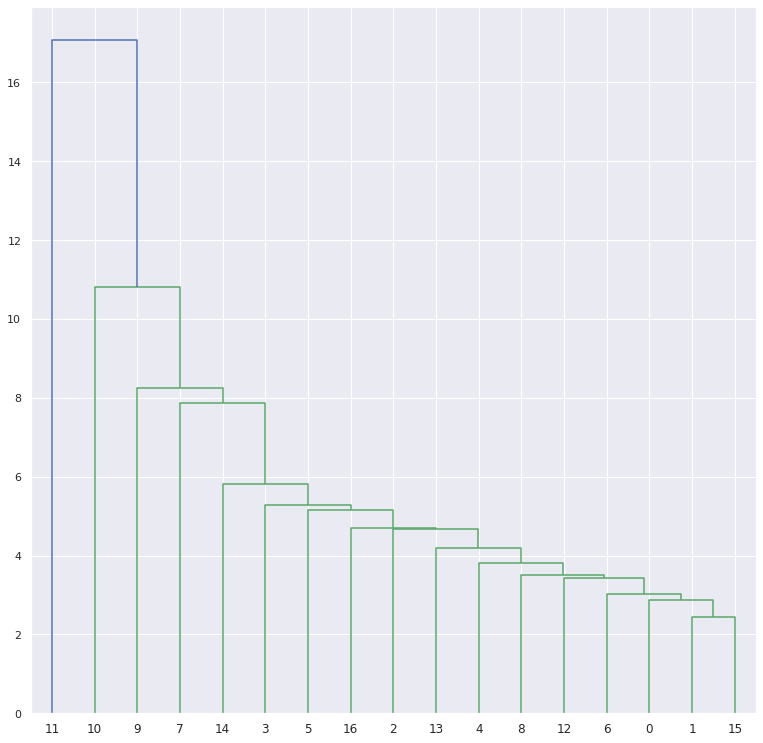

In [51]:
dendrograma = dendrogram(matriz_de_distancia)